In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob=lambda chisq,df: stats.chi2.sf(chisq,df)

In [ ]:
# import and clean the data

In [59]:
data0=pd.read_csv("Bank_data.csv")
data0.describe(include="all")

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [60]:
data0.sort_values(by="Unnamed: 0")

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [61]:
data1=data0.drop(["Unnamed: 0"],axis=1)
data1.describe(include="all")

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [62]:
data1["interest rate"]=data1["interest_rate"]
data1["march call"]=data1["march"]
data1["may call"]=data1["may"]
data1["previous attempt"]=data1["previous"]
data1["previous contract duration"]=data1["duration"]
data1["subscription result"]=data1["y"]

In [63]:
data2=data1.drop(["interest_rate","march","may","previous","duration","y"],axis=1)

In [64]:
data2

,credit,interest rate,march call,may call,previous attempt,previous contract duration,subscription result
0,0.0,1.334,1.0,0.0,0.0,117.0,no
1,0.0,0.767,0.0,2.0,1.0,274.0,yes
2,0.0,4.858,1.0,0.0,0.0,167.0,no
3,0.0,4.120,0.0,0.0,0.0,686.0,yes
4,0.0,4.856,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...
513,0.0,1.334,1.0,0.0,0.0,204.0,no
514,0.0,0.861,0.0,2.0,1.0,806.0,yes
515,0.0,0.879,0.0,0.0,0.0,290.0,no
516,0.0,0.877,0.0,5.0,1.0,473.0,yes


In [65]:
data2.describe(include="all")

,credit,interest rate,march call,may call,previous attempt,previous contract duration,subscription result
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,0.034749,2.835776,0.266409,0.388031,0.127413,382.177606,NaN
std,0.183321,1.876903,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,9.000000,NaN
25%,0.000000,1.042750,0.000000,0.000000,0.000000,155.000000,NaN
50%,0.000000,1.466000,0.000000,0.000000,0.000000,266.500000,NaN
75%,0.000000,4.956500,1.000000,0.000000,0.000000,482.750000,NaN


In [66]:
data2.isnull().count()

credit                        518
interest rate                 518
march call                    518
may call                      518
previous attempt              518
previous contract duration    518
subscription result           518
dtype: int64

In [67]:
# understand the data

In [69]:
data2["subscription result"]=data2["subscription result"].map({"yes":1, "no":0})

In [70]:
data2

,credit,interest rate,march call,may call,previous attempt,previous contract duration,subscription result
0,0.0,1.334,1.0,0.0,0.0,117.0,0
1,0.0,0.767,0.0,2.0,1.0,274.0,1
2,0.0,4.858,1.0,0.0,0.0,167.0,0
3,0.0,4.120,0.0,0.0,0.0,686.0,1
4,0.0,4.856,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,0.0,1.334,1.0,0.0,0.0,204.0,0
514,0.0,0.861,0.0,2.0,1.0,806.0,1
515,0.0,0.879,0.0,0.0,0.0,290.0,0
516,0.0,0.877,0.0,5.0,1.0,473.0,1


In [71]:
y=data2["subscription result"]

In [77]:
x0=data2.drop(["subscription result"],axis=1)
x1=data2["credit"]
x2=data2["interest rate"]
x3=data2["march call"]
x4=data2["may call"]
x5=data2["previous attempt"]
x6=data2["previous contract duration"]

In [110]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

In [80]:
x1_log=sm.add_constant(x1)
result_log1=sm.Logit(y,x1_log)
result_1=result_log1.fit()

Optimization terminated successfully.
         Current function value: 0.676022
         Iterations 7


In [84]:
x2_log=sm.add_constant(x2)
result_log2=sm.Logit(y,x2_log)
result_2=result_log2.fit()

Optimization terminated successfully.
         Current function value: 0.568641
         Iterations 5


In [85]:
x3_log=sm.add_constant(x3)
result_log3=sm.Logit(y,x3_log)
result_3=result_log3.fit()

Optimization terminated successfully.
         Current function value: 0.676121
         Iterations 4


In [86]:
x4_log=sm.add_constant(x4)
result_log4=sm.Logit(y,x4_log)
result_4=result_log4.fit()

Optimization terminated successfully.
         Current function value: 0.638757
         Iterations 6


In [87]:
x5_log=sm.add_constant(x5)
result_log5=sm.Logit(y,x5_log)
result_5=result_log5.fit()

Optimization terminated successfully.
         Current function value: 0.637404
         Iterations 6


In [88]:
x6_log=sm.add_constant(x6)
result_log6=sm.Logit(y,x6_log)
result_6=result_log6.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [89]:
x0_log=sm.add_constant(x0)
result_log0=sm.Logit(y,x0_log)
result_0=result_log0.fit()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


In [90]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     subscription result   No. Observations:                  518
Model:                           Logit   Df Residuals:                      516
Method:                            MLE   Df Model:                            1
Date:                 Tue, 19 Jan 2021   Pseudo R-squ.:                 0.02471
Time:                         04:04:04   Log-Likelihood:                -350.18
converged:                        True   LL-Null:                       -359.05
Covariance Type:             nonrobust   LLR p-value:                 2.531e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0640      0.089     -0.715      0.474      -0.239       0.111
credit         2.8972      1.033      2.805      0.005       0.873       4.922
==============================================================================
"""

In [91]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     subscription result   No. Observations:                  518
Model:                           Logit   Df Residuals:                      516
Method:                            MLE   Df Model:                            1
Date:                 Tue, 19 Jan 2021   Pseudo R-squ.:                  0.1796
Time:                         04:04:13   Log-Likelihood:                -294.56
converged:                        True   LL-Null:                       -359.05
Covariance Type:             nonrobust   LLR p-value:                 6.822e-30
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6146      0.181      8.896      0.000       1.259       1.970
interest rate    -0.5734      0.054    -10.531      0.000      -0.680      -0.467
=================================================================================
"""

In [93]:
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     subscription result   No. Observations:                  518
Model:                           Logit   Df Residuals:                      516
Method:                            MLE   Df Model:                            1
Date:                 Tue, 19 Jan 2021   Pseudo R-squ.:                 0.02456
Time:                         04:04:42   Log-Likelihood:                -350.23
converged:                        True   LL-Null:                       -359.05
Covariance Type:             nonrobust   LLR p-value:                 2.670e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2220      0.103      2.150      0.032       0.020       0.424
march call    -0.8506      0.206     -4.121      0.000      -1.255      -0.446
==============================================================================
"""

In [94]:
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     subscription result   No. Observations:                  518
Model:                           Logit   Df Residuals:                      516
Method:                            MLE   Df Model:                            1
Date:                 Tue, 19 Jan 2021   Pseudo R-squ.:                 0.07847
Time:                         04:05:08   Log-Likelihood:                -330.88
converged:                        True   LL-Null:                       -359.05
Covariance Type:             nonrobust   LLR p-value:                 6.070e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3386      0.101     -3.351      0.001      -0.537      -0.141
may call       1.0667      0.175      6.092      0.000       0.723       1.410
==============================================================================
"""

In [95]:
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     subscription result   No. Observations:                  518
Model:                           Logit   Df Residuals:                      516
Method:                            MLE   Df Model:                            1
Date:                 Tue, 19 Jan 2021   Pseudo R-squ.:                 0.08042
Time:                         04:05:18   Log-Likelihood:                -330.18
converged:                        True   LL-Null:                       -359.05
Covariance Type:             nonrobust   LLR p-value:                 2.976e-14
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2401      0.095     -2.534      0.011      -0.426      -0.054
previous attempt     2.5427      0.439      5.798      0.000       1.683       3.402
====================================================================================
"""

In [96]:
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     subscription result   No. Observations:                  518
Model:                           Logit   Df Residuals:                      516
Method:                            MLE   Df Model:                            1
Date:                 Tue, 19 Jan 2021   Pseudo R-squ.:                  0.2121
Time:                         04:05:30   Log-Likelihood:                -282.89
converged:                        True   LL-Null:                       -359.05
Covariance Type:             nonrobust   LLR p-value:                 5.387e-35
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
previous contract duration     0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================================
"""

In [97]:
result_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     subscription result   No. Observations:                  518
Model:                           Logit   Df Residuals:                      511
Method:                            MLE   Df Model:                            6
Date:                 Tue, 19 Jan 2021   Pseudo R-squ.:                  0.5153
Time:                         04:05:39   Log-Likelihood:                -174.02
converged:                        True   LL-Null:                       -359.05
Covariance Type:             nonrobust   LLR p-value:                 7.579e-77
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1385      0.339     -0.408      0.683      -0.804       0.527
credit                         2.4028      1.090      2.205      0.027       0.267       4.538
interest rate                 -0.7802      0.092     -8.471      0.000      -0.961      -0.600
march call                    -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may call                       0.1946      0.229      0.849      0.396      -0.255       0.644
previous attempt               1.2746      0.583      2.186      0.029       0.132       2.417
previous contract duration     0.0070      0.001      9.386      0.000       0.006       0.008
==============================================================================================
"""

In [118]:
x2_sorted=np.sort(np.array(x2))
f2_sorted=np.sort(f(x2,result_2.params[0],result_2.params[1]))

Text(0, 0.5, 'Subscription Result')

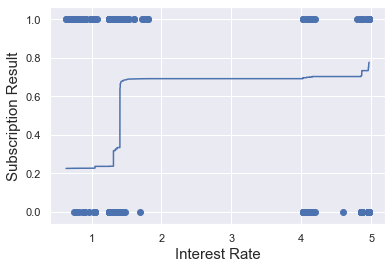

In [127]:
plt.scatter(x2,y)
plt.plot(x2_sorted,f2_sorted)
plt.xlabel("Interest Rate",fontsize=15)
plt.ylabel("Subscription Result",fontsize=15)

In [123]:
x6_sorted=np.sort(np.array(x6))
f6_sorted=np.sort(f(x6,result_6.params[0],result_6.params[1]))

Text(0, 0.5, 'Subscription Result')

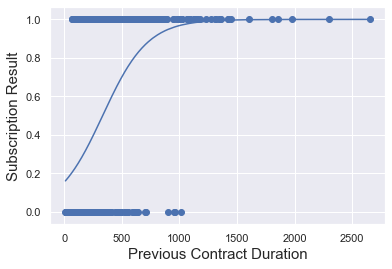

In [129]:
plt.scatter(x6,y)
plt.plot(x6_sorted,f6_sorted)
plt.xlabel("Previous Contract Duration",fontsize=15)
plt.ylabel("Subscription Result",fontsize=15)

In [ ]:
# Make predictions on the test data

In [131]:
data_test0=pd.read_csv("Bank_data_testing.csv")
data_test0.describe(include="all")

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,110.500000,2.922095,0.031532,0.274775,0.346847,0.099099,398.860360,NaN
std,64.230055,1.891766,0.175144,0.447410,0.755950,0.299470,410.565798,NaN
min,0.000000,0.639000,0.000000,0.000000,0.000000,0.000000,6.000000,NaN
25%,55.250000,1.049250,0.000000,0.000000,0.000000,0.000000,144.750000,NaN
50%,110.500000,1.714000,0.000000,0.000000,0.000000,0.000000,255.500000,NaN
75%,165.750000,4.960000,0.000000,1.000000,0.000000,0.000000,525.250000,NaN


In [132]:
data_test1=data_test0.drop(["Unnamed: 0"],axis=1)
data_test1.describe(include="all")

,interest_rate,credit,march,may,previous,duration,y
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,2.922095,0.031532,0.274775,0.346847,0.099099,398.860360,NaN
std,1.891766,0.175144,0.447410,0.755950,0.299470,410.565798,NaN
min,0.639000,0.000000,0.000000,0.000000,0.000000,6.000000,NaN
25%,1.049250,0.000000,0.000000,0.000000,0.000000,144.750000,NaN
50%,1.714000,0.000000,0.000000,0.000000,0.000000,255.500000,NaN
75%,4.960000,0.000000,1.000000,0.000000,0.000000,525.250000,NaN


In [133]:
data_test1["interest rate"]=data_test1["interest_rate"]
data_test1["march call"]=data_test1["march"]
data_test1["may call"]=data_test1["may"]
data_test1["previous attempt"]=data_test1["previous"]
data_test1["previous contract duration"]=data_test1["duration"]
data_test1["subscription result"]=data_test1["y"]

In [134]:
data_test2=data_test1.drop(["interest_rate","march","may","previous","duration","y"],axis=1)

In [145]:
data_test2["subscription result"]=data_test2["subscription result"].map({"yes": 1, "no": 0})

In [146]:
data_test2.describe(include="all")

,credit,interest rate,march call,may call,previous attempt,previous contract duration,subscription result
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,0.031532,2.922095,0.274775,0.346847,0.099099,398.860360,0.50000
std,0.175144,1.891766,0.447410,0.755950,0.299470,410.565798,0.50113
min,0.000000,0.639000,0.000000,0.000000,0.000000,6.000000,0.00000
25%,0.000000,1.049250,0.000000,0.000000,0.000000,144.750000,0.00000
50%,0.000000,1.714000,0.000000,0.000000,0.000000,255.500000,0.50000
75%,0.000000,4.960000,1.000000,0.000000,0.000000,525.250000,1.00000
max,1.000000,4.968000,1.000000,4.000000,1.000000,3643.000000,1.00000


In [147]:
y_test=data_test2["subscription result"]
x_test=data_test2.drop(["subscription result"],axis=1)

In [148]:
x_test0=sm.add_constant(x_test)

In [149]:
prediction=result_0.predict(x_test0)

In [195]:
bins=np.array([0,0.5,1])

In [196]:
summary=np.histogram2d(y_test,prediction,bins=bins)[0]

In [197]:
summary

array([[94., 17.],
       [12., 99.]])

In [200]:
summary_chart=pd.DataFrame(summary)
summary_chart.columns=["Predict 0","Predict 1"]
summary_chart.rename(index={0: "Actual 0",1:"Actual 1"})

,Predict 0,Predict 1
Actual 0,94.0,17.0
Actual 1,12.0,99.0


In [214]:
Accuracy=(summary[0,0]+summary[1,1])/summary.sum()*100

In [217]:
print("{:.2f}".format(Accuracy)+"%")

86.94%
